# Predictive Analysis Project Using Python

### Background of the dataset
The data contains information from the 1990 California census. **So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity.

**variable descrition:**

1. **longitude:** A measure of how far west a house is; a higher value is farther west
2. **latitude:** A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge:** Median age of a house within a block; a lower number is a newer building
4. **totalRooms:** Total number of rooms within a block
5. **totalBedrooms:** Total number of bedrooms within a block
6. **population:** Total number of people residing within a block
7. **households:** Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
10. **oceanProximity:** Location of the house w.r.t ocean/sea



##### importing neccessary libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling-
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# 1. Data gathering

In [2]:
#Loading in data
df = pd.read_csv('housing.csv')

##### data assessing 

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19957,-119.32,36.22,5.0,2319.0,438.0,1283.0,423.0,3.6343,95400.0,INLAND
2095,-119.76,36.75,35.0,1607.0,383.0,1407.0,382.0,2.1900,53400.0,INLAND
8791,-118.38,33.80,36.0,4421.0,702.0,1433.0,624.0,8.0838,500001.0,NEAR OCEAN
4533,-118.22,34.03,45.0,554.0,214.0,888.0,218.0,1.8125,139600.0,<1H OCEAN
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN
3580,-118.53,34.23,27.0,2131.0,543.0,1065.0,528.0,3.2404,230400.0,<1H OCEAN
12051,-117.55,33.88,19.0,2472.0,618.0,2143.0,610.0,2.2372,108800.0,INLAND
14049,-117.13,32.76,27.0,2280.0,695.0,1235.0,664.0,1.9392,142900.0,NEAR OCEAN
889,-121.95,37.55,21.0,10687.0,1540.0,4552.0,1520.0,6.6478,333400.0,<1H OCEAN
1028,-120.55,38.45,17.0,2277.0,474.0,767.0,356.0,2.5208,99100.0,INLAND


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Problems with the data to fixed
1. remove null values in total bedrooms column
2. For feature engineering process change ocean proximity entries to binary feautures either 0 or 1
3. Then drop the ocean proximity column
4. Rename median_house_value to house_price

# 2. Data Pre-processing

In [12]:
# 1. Droping null values 
df.dropna(inplace = True)

In [13]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
df.rename(columns = {'housing_median_age' : 'house_age'}, inplace  = True)
df.rename(columns = {'median_house_value' : 'house_price'}, inplace  = True)
df.head()

,longitude,latitude,house_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration Analysis

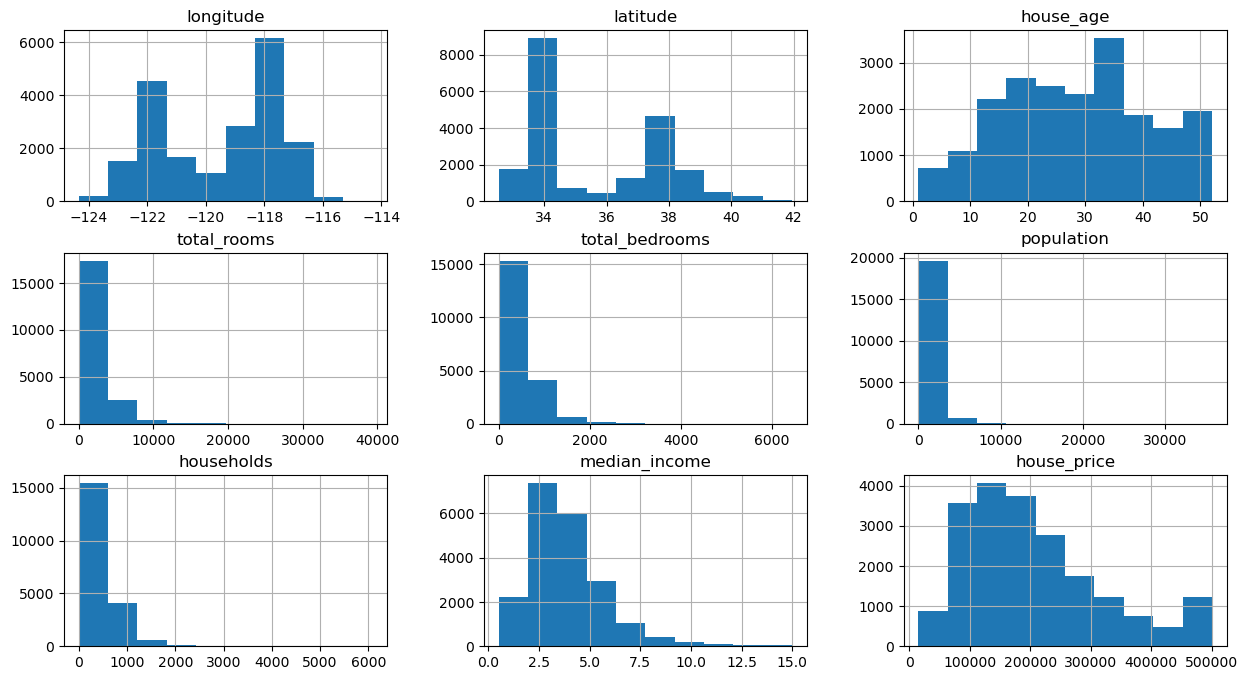

In [16]:
df.hist(figsize = (15,8));

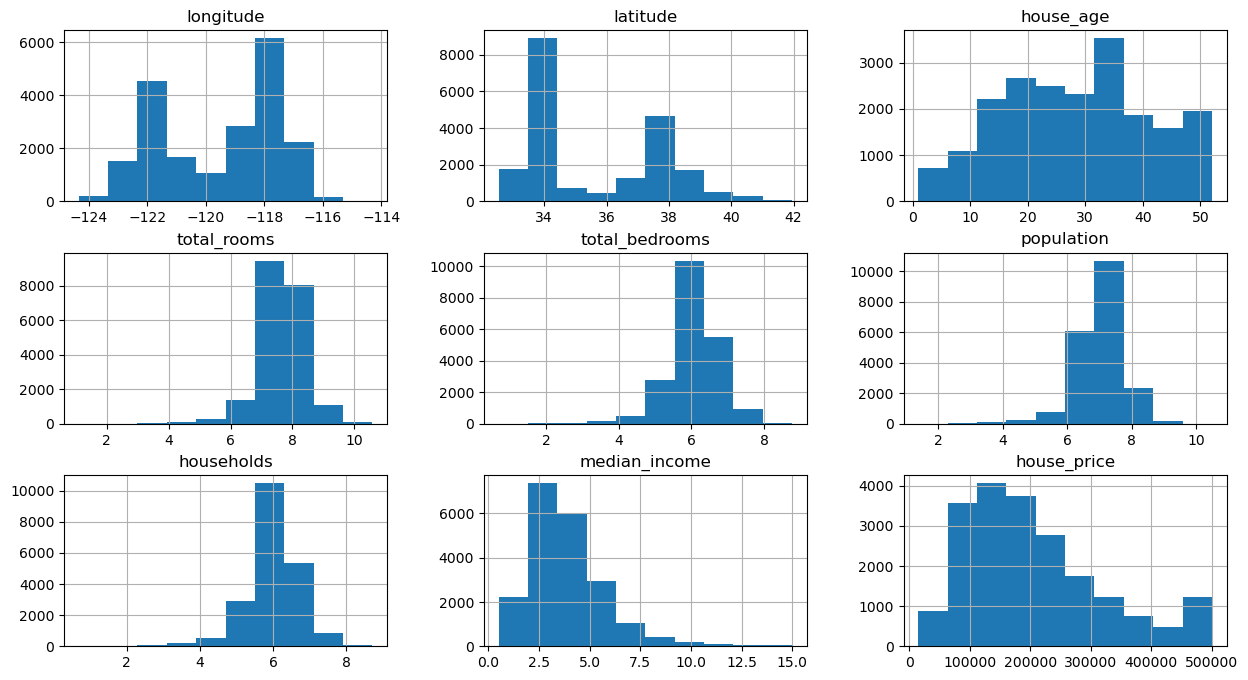

In [17]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

df.hist(figsize = (15,8));

C:\Users\HP\AppData\Local\Temp\ipykernel_11068\2443189700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

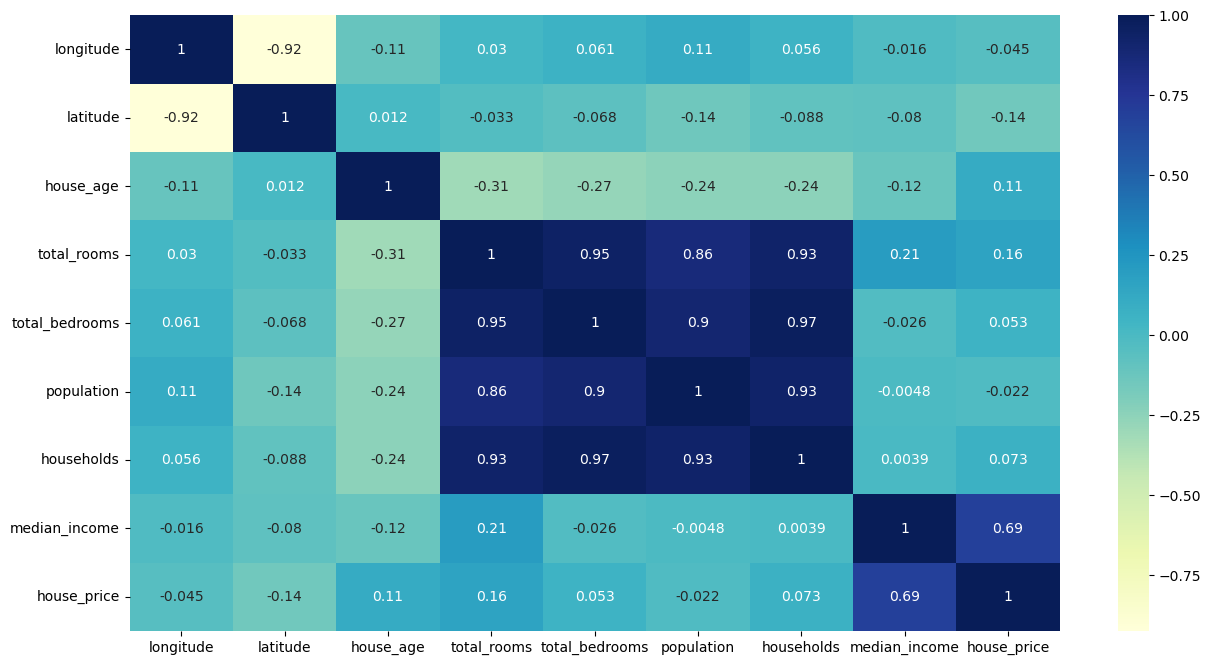

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

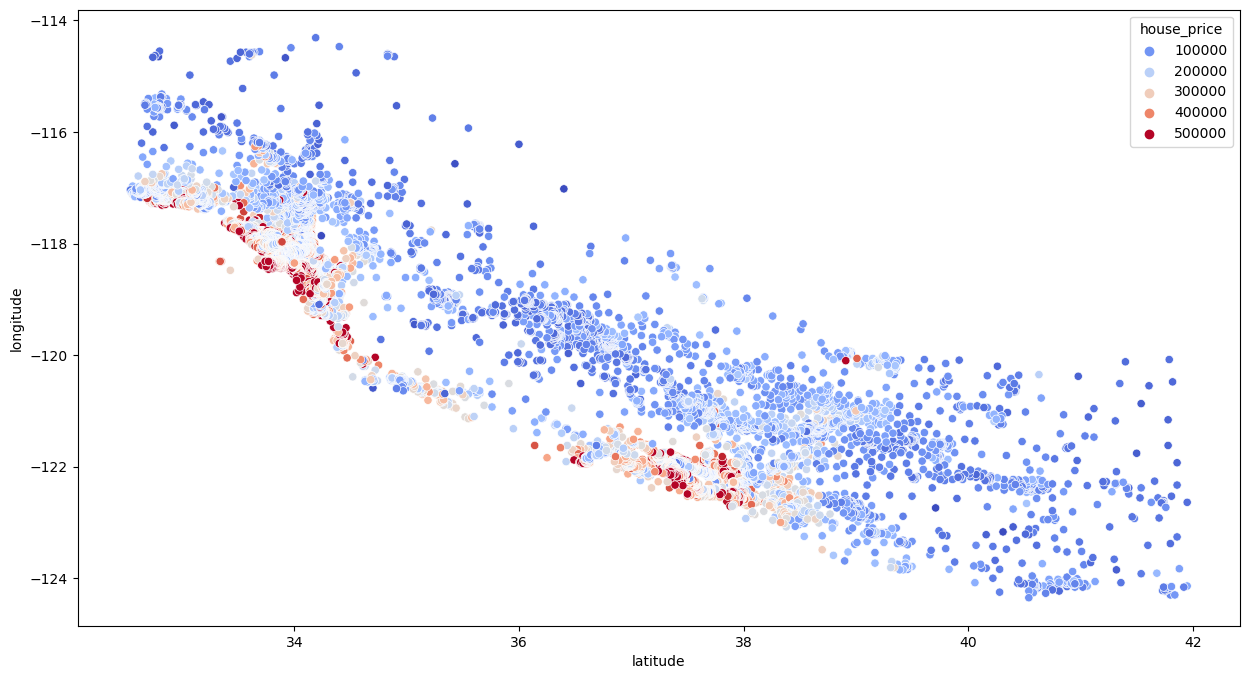

In [19]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'house_price', palette = 'coolwarm')

# 4. Feauture Selection

In [45]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
#  changing ocean proximity to binary numbers i.e 1 or 0
gdummies = pd.get_dummies(df.ocean_proximity)
df = df.drop(['ocean_proximity'], axis = 1)
gdummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [12]:
# 2. join gdummies with the dataset
df = df.join(gdummies )

In [15]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,3.6912,261100.0,0,0,0,1,0


In [13]:
df['bedroom_ratio']=  df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df ['total_rooms'] / df['households']    

In [49]:
df.head()

,longitude,latitude,house_age,total_rooms,total_bedrooms,population,households,median_income,house_price,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096,6.281853


In [14]:
df.columns

Index(['longitude', 'latitude', 'house_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'house_price', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')

<Axes: >

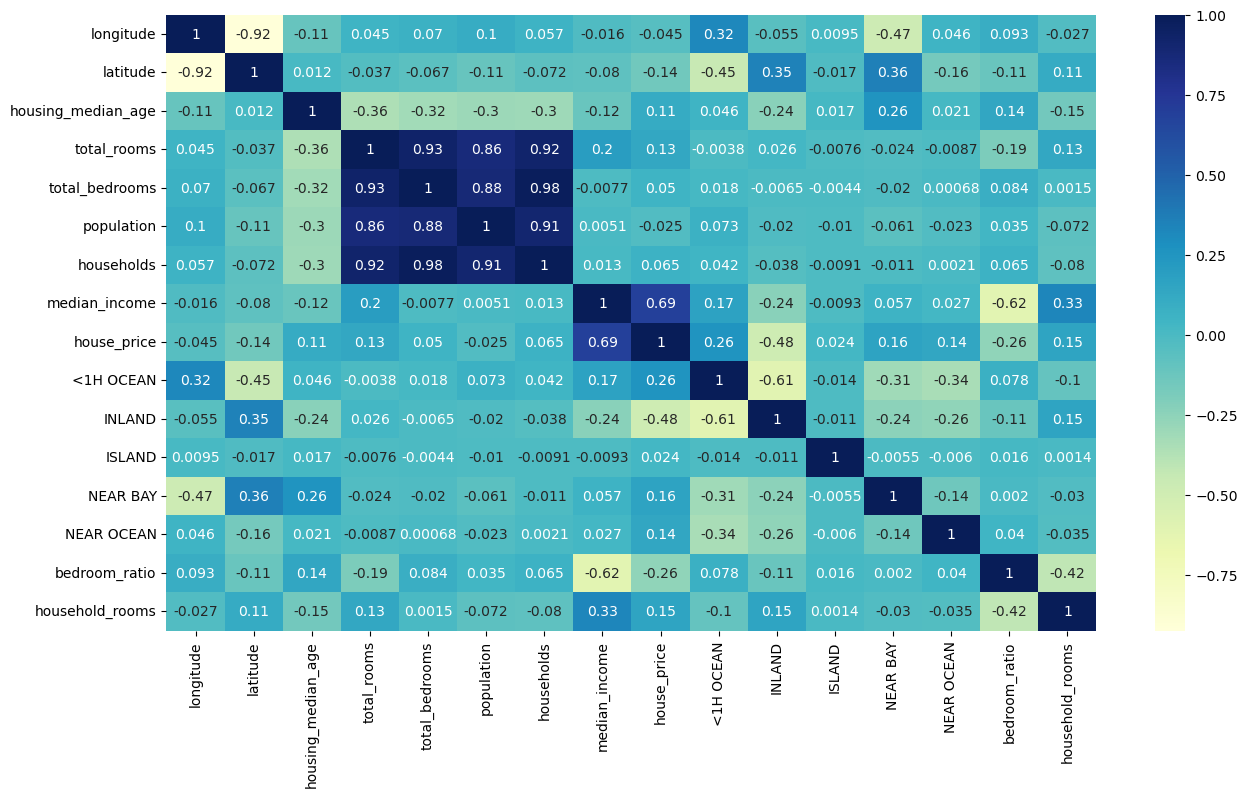

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

# 5. Model Training 

In [15]:
X = df.drop(['house_price'], axis = 1)
y = df['house_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [56]:
X_train

,longitude,latitude,house_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10403,-117.49,33.64,3.0,8874.0,1302.0,3191.0,1027.0,6.8588,1,0,0,0,0,0.146721,8.640701
14620,-117.16,32.79,32.0,1731.0,413.0,1569.0,427.0,3.3375,0,0,0,0,1,0.238590,4.053864
8722,-118.36,33.84,35.0,1577.0,279.0,743.0,274.0,5.7654,1,0,0,0,0,0.176918,5.755474
10770,-117.90,33.66,13.0,1642.0,423.0,841.0,368.0,3.6042,1,0,0,0,0,0.257613,4.461957
5122,-118.31,33.96,47.0,1586.0,322.0,1077.0,339.0,4.4861,1,0,0,0,0,0.203026,4.678466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,-118.21,34.10,40.0,1684.0,316.0,795.0,330.0,5.2723,1,0,0,0,0,0.187648,5.103030
8775,-118.31,33.80,29.0,2795.0,572.0,1469.0,557.0,3.7167,1,0,0,0,0,0.204651,5.017953
1298,-121.82,38.01,47.0,1265.0,254.0,587.0,247.0,2.6364,0,1,0,0,0,0.200791,5.121457
3998,-118.62,34.17,32.0,1491.0,355.0,756.0,296.0,3.0404,1,0,0,0,0,0.238095,5.037162


In [30]:
y_train

20180    500001.0
13957    150000.0
11963     92000.0
10647    500001.0
4110     483800.0
           ...   
1091     116700.0
17827    272700.0
5125     101500.0
10678    384700.0
9059     119600.0
Name: house_price, Length: 16346, dtype: float64

In [31]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1079,-121.82,39.73,44.0,7.980708,6.492240,7.224025,6.440947,2.2925,0,1,0,0,0,0.813492,1.239058
7462,-118.18,33.93,35.0,6.859615,5.605802,6.856462,5.568345,2.4297,1,0,0,0,0,0.817218,1.231895
17862,-121.90,37.45,16.0,7.990577,6.102559,7.330405,6.133398,5.6063,1,0,0,0,0,0.763719,1.302798
1662,-121.93,37.93,16.0,7.964503,5.971262,6.993933,5.934894,6.2990,0,1,0,0,0,0.749734,1.341979
8386,-118.36,33.98,46.0,7.262629,5.648974,6.663133,5.613128,5.0570,1,0,0,0,0,0.777814,1.293865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,-119.90,36.20,43.0,5.236442,3.663562,4.672829,3.713572,1.8750,0,1,0,0,0,0.699628,1.410082
7103,-118.00,33.89,34.0,7.566828,5.755742,6.960348,5.758902,5.1377,1,0,0,0,0,0.760655,1.313936
16006,-122.46,37.74,51.0,7.552762,5.676754,6.562444,5.652489,6.2561,0,0,0,1,0,0.751613,1.336183
12926,-121.30,38.66,28.0,8.129175,6.311735,7.344073,6.317165,4.2188,0,1,0,0,0,0.776430,1.286839


In [16]:
y_test

2945      33200.0
2139      76900.0
9722     253500.0
20179    175700.0
17520    330600.0
           ...   
1573     200000.0
5813     205000.0
11547    248200.0
7242     164600.0
5633     187500.0
Name: house_price, Length: 4087, dtype: float64

In [17]:
### Standadize Categorical Features
#Standardizing Numeric Features

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s =  scaler.transform(X_test)

In [18]:
X_test_s

array([[ 0.29316985, -0.12912888, -0.60572289, ..., -0.38728925,
        -0.15644502,  0.06136426],
       [-0.08612172,  0.53674949,  0.10798184, ..., -0.38728925,
         0.01833007, -0.43930496],
       [-1.04433201,  0.5930209 , -1.08152603, ..., -0.38728925,
        -0.35783421,  0.03701834],
       ...,
       [ 0.77227499, -0.88410365, -0.20922026, ..., -0.38728925,
        -0.41537907,  0.13550744],
       [ 0.72236821, -0.75749297,  0.90098708, ..., -0.38728925,
         0.29171097, -0.39691531],
       [ 0.64251735, -0.87941436, -0.84362446, ...,  2.58204945,
         2.35146858, -1.80562355]])

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_s, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 66234.1029
- Mean Absolute Error: 47914.1034
- R2 Score: 0.6706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66153.4273
- Mean Absolute Error: 47820.0737
- R2 Score: 0.6720




c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+13, tolerance: 2.177e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 66234.3849
- Mean Absolute Error: 47911.5239
- R2 Score: 0.6706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66155.5382
- Mean Absolute Error: 47819.7939
- R2 Score: 0.6720


Ridge
Model performance for Training set
- Root Mean Squared Error: 66234.2841
- Mean Absolute Error: 47910.7667
- R2 Score: 0.6706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 66154.8342
- Mean Absolute Error: 47818.4416
- R2 Score: 0.6720


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 49345.6928
- Mean Absolute Error: 33152.6637
- R2 Score: 0.8172
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 60401.3263
- Mean Absolute Error: 40723.9499
- R2 Score: 0.7266


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.000

Based on the provided results, here are some observations for each model:

1. Linear Regression: The model shows moderate performance with an R2 score of 0.6724 on both the training and test sets. The root mean squared error (RMSE) and mean absolute error (MAE) values are relatively high compared to other models.

2. Lasso Regression: Lasso regression performs similarly to linear regression, with slightly lower RMSE and MAE values, but the same R2 score of 0.6724.

3. Ridge Regression: Ridge regression also exhibits similar performance to linear regression and lasso regression, with comparable RMSE, MAE, and R2 score values.

4. K-Neighbors Regressor: The model performs better than linear regression-based models, with an R2 score of 0.8183 on the training set and 0.7311 on the test set. The RMSE and MAE values are lower compared to linear regression-based models.

5. Decision Tree: The decision tree model overfits the training data perfectly, resulting in an RMSE and MAE of 0.0000 and an R2 score of 1.0000. However, it does not generalize well to the test set, as indicated by the relatively high RMSE, MAE, and lower R2 score.

6. Random Forest Regressor: Random forest performs well, with a high R2 score of 0.9743 on the training set and 0.8304 on the test set. The RMSE and MAE values are significantly lower compared to linear regression-based models.

7. XGBRegressor: XGBoost shows strong performance with an R2 score of 0.9404 on the training set and 0.8419 on the test set. The RMSE and MAE values are lower compared to linear regression-based models.

8. CatBoosting Regressor: CatBoosting also performs well, with an R2 score of 0.9066 on the training set and 0.8548 on the test set. The RMSE and MAE values are lower compared to linear regression-based models.

9. AdaBoost Regressor: AdaBoost performs the worst among all the models, with relatively high RMSE and MAE values and a low R2 score on both the training and test sets.

Based on these observations, the Random Forest Regressor, XGBRegressor, and CatBoosting Regressor seem to be the most promising models. They consistently achieve high R2 scores and lower RMSE and MAE values on both the training and test sets, indicating good performance and generalization capabilities. Among these three, the Random Forest Regressor stands out with the highest R2 score on the test set and the lowest RMSE and MAE values. Therefore, proceeding with the Random Forest Regressor would be a reasonable choice for this advanced ML project.

# Model Optimization
###  Hyperparamter Tuning using GridSearchCV module

The range of values for the following parameters typically used in Random Forest and Decision Tree models are as follows:

1. `n_estimators`: This parameter represents the number of trees in the forest. It usually takes positive integer values. There is no strict upper limit, but it is common to set it in the range of 10 to 1000 or even higher, depending on the dataset and computational resources available.

2. `max_depth`: This parameter determines the maximum depth of each tree in the forest. It controls the complexity of the tree and helps prevent overfitting. It typically takes positive integer values or `None`. If set to `None`, nodes are expanded until all leaves are pure or contain less than `min_samples_split` samples. The range of values for `max_depth` can vary depending on the dataset and problem, but a common range is 1 to 100.

3. `min_samples_split`: This parameter specifies the minimum number of samples required to split an internal node. It helps control the trade-off between underfitting and overfitting. It typically takes positive integer values. The range of values for `min_samples_split` can vary depending on the dataset size and complexity, but a common range is 2 to 10.

4. `max_features`: This parameter determines the number of features to consider when looking for the best split at each node. It controls the randomness and diversity among the trees. It can take various values, including integers, floats, or strings.

   - If `max_features` is an integer, it represents the number of features to consider at each split. Common values range from 1 to the total number of features.
   - If `max_features` is a float between 0 and 1, it represents the fraction of features to consider at each split. Common values range from 0.1 to 0.9.
   - If `max_features` is "auto" or "sqrt", it considers the square root of the total number of features.
   - If `max_features` is "log2", it considers the log base 2 of the total number of features.
   - If `max_features` is `None`, it considers all features.

It's important to note that the specific ranges and values for these parameters can be adjusted based on the dataset, problem, and specific requirements. Experimentation and cross-validation techniques can help identify the optimal values for these parameters.

### Perform grid search with Random Forest Regressor

In [57]:
# Define the parameter grid for Random Forest Regressor

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    "max_features": ["auto", "sqrt"]
}

# Perform grid search with Random Forest Regressor
rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and performance for Random Forest Regressor
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print ('Best Parameter for training the model:',best_params)
print ('The corresponding best score:', best_score)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameter for training the model: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
The corresponding best score: -2516830119.81397


### Using grid search result to train Random Forest Regressor

In [58]:
  # Train model
rfr = RandomForestRegressor(n_estimators = 100, max_depth = None, max_features =  'auto', min_samples_split= 5)  
rfr.fit(X_train_s, y_train)    
 # Make predictions
y_train_pred = rfr.predict(X_train_s)
y_test_pred = rfr.predict(X_test_s)
    
        # Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2)) 

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model performance for Training set
- Root Mean Squared Error: 22022.2664
- Mean Absolute Error: 13947.9021
- R2 Score: 0.9638
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 48075.2450
- Mean Absolute Error: 31444.4920
- R2 Score: 0.8226


### Perform grid search with XGBRegressor

The range of values for the following parameters typically used in Gradient Boosting models, such as XGBoost and AdaBoost, are as follows:

1. `learning_rate`: This parameter controls the contribution of each tree to the overall ensemble. It is used to shrink the effect of each individual tree and prevent overfitting. It typically takes positive float values between 0 and 1. Common values range from 0.01 to 0.1, but can go higher depending on the dataset and problem.

2. `max_depth`: This parameter determines the maximum depth of each tree in the ensemble. It controls the complexity of the tree and helps prevent overfitting. It typically takes positive integer values or `None`. If set to `None`, nodes are expanded until all leaves are pure or contain less than `min_samples_split` samples. The range of values for `max_depth` can vary depending on the dataset and problem, but a common range is 1 to 10.

3. `n_estimators`: This parameter represents the number of trees in the ensemble. It determines the number of boosting iterations. It typically takes positive integer values. The range of values for `n_estimators` can vary depending on the dataset and problem, but a common range is 100 to 1000 or even higher, depending on the computational resources available.

4. `subsample`: This parameter controls the fraction of samples to be used for fitting each individual tree. It helps introduce randomness and reduce overfitting. It typically takes float values between 0 and 1. Common values range from 0.5 to 1, where 1 means using all samples and 0.5 means using 50% of the samples.

It's important to note that the specific ranges and values for these parameters can be adjusted based on the dataset, problem, and specific requirements. Experimentation and cross-validation techniques can help identify the optimal values for these parameters.

In [61]:
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

gb_model = XGBRegressor()

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_params, cv=5)
random_search.fit(X_train_s, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print ('Best Parameter for training the model:',best_params)
print ('The corresponding best score:', best_score)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameter for training the model: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
The corresponding best score: 0.8250763160142578


### Using grid search result to train XGBRegressor

In [62]:
 # Train model
Xgbr = XGBRegressor(n_estimators = 200, max_depth = 5, learning_rate= 0.1)  
Xgbr.fit(X_train_s, y_train)    
   # Make predictions
y_train_pred = rfr.predict(X_train_s)
y_test_pred = rfr.predict(X_test_s)
    
      # Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2)) 

Model performance for Training set
- Root Mean Squared Error: 20346.9740
- Mean Absolute Error: 12945.3269
- R2 Score: 0.9691
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47982.6704
- Mean Absolute Error: 31350.6635
- R2 Score: 0.8232


In [63]:
 # Train model
Xgbr = XGBRegressor(n_estimators = 300, max_depth = 7, subsample = 1, learning_rate= 0.1)  
Xgbr.fit(X_train_s, y_train)    
   # Make predictions
y_train_pred = rfr.predict(X_train_s)
y_test_pred = rfr.predict(X_test_s)
    
      # Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2)) 

Model performance for Training set
- Root Mean Squared Error: 20346.9740
- Mean Absolute Error: 12945.3269
- R2 Score: 0.9691
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47982.6704
- Mean Absolute Error: 31350.6635
- R2 Score: 0.8232


In [ ]:
"""
# After Model Optimization i will going on with the first result XGBoot result.
# compairing Regressor result and XGBoot regressor

Regressor
Model performance for Training set
- Root Mean Squared Error: 22022.2664
- Mean Absolute Error: 13947.9021
- R2 Score: 0.9638
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 48075.2450
- Mean Absolute Error: 31444.4920
- R2 Score: 0.8226 


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 27707.5136
- Mean Absolute Error: 19659.8749
- R2 Score: 0.9427
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47261.1735
- Mean Absolute Error: 31048.3529
- R2 Score: 0.8285

"""

In [21]:
 # Train model
classifier = XGBRegressor()  
classifier.fit(X_train_s, y_train)    
   # Make predictions
y_train_pred = classifier.predict(X_train_s)
y_test_pred = classifier.predict(X_test_s)
    
      # Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2)) 

Model performance for Training set
- Root Mean Squared Error: 27725.8861
- Mean Absolute Error: 19807.0181
- R2 Score: 0.9423
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47649.1058
- Mean Absolute Error: 31264.5512
- R2 Score: 0.8298


In [22]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(XGBRegressor, pickle_out)
pickle_out.close()